In [80]:
import pandas as pd

In [81]:
def create_ts_data(df, window_size=5):
    i = 1
    while i < window_size:
        df["co2_{}".format(i)] = df["co2"].shift(-i)
        i += 1
    df["target"] = df["co2"].shift(-i)
    df = df.dropna(axis=0)
    return df

In [82]:
df = pd.read_csv("E:/co2.csv")
df["time"]=pd.to_datetime(df["time"])
df.dtypes

time    datetime64[ns]
co2            float64
dtype: object

In [ ]:
df["co2"] = df["co2"].interpolate()  # Nội suy giá trị NaN
df

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
...,...,...
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3


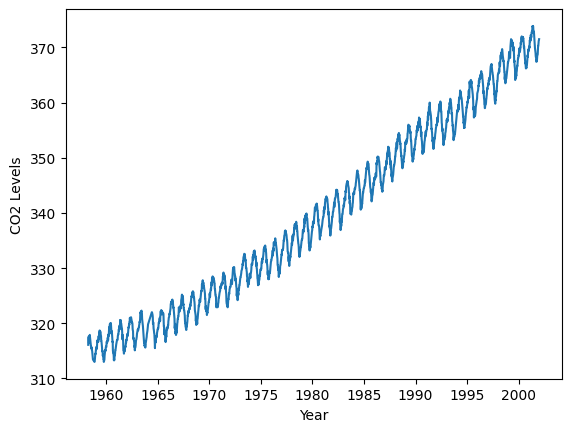

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df["time"], df["co2"])
ax.set_xlabel("Year")  
ax.set_ylabel("CO2 Levels") 
plt.show()


In [85]:
df = create_ts_data(df)
print(df)

           time    co2  co2_1  co2_2  co2_3  co2_4  target
0    1958-03-29  316.1  317.3  317.6  317.5  316.4  316.90
1    1958-04-05  317.3  317.6  317.5  316.4  316.9  317.20
2    1958-04-12  317.6  317.5  316.4  316.9  317.2  317.50
3    1958-04-19  317.5  316.4  316.9  317.2  317.5  317.90
4    1958-04-26  316.4  316.9  317.2  317.5  317.9  317.55
...         ...    ...    ...    ...    ...    ...     ...
2274 2001-10-27  368.7  368.7  368.8  369.7  370.3  370.30
2275 2001-11-03  368.7  368.8  369.7  370.3  370.3  370.80
2276 2001-11-10  368.8  369.7  370.3  370.3  370.8  371.20
2277 2001-11-17  369.7  370.3  370.3  370.8  371.2  371.30
2278 2001-11-24  370.3  370.3  370.8  371.2  371.3  371.50

[2279 rows x 7 columns]


In [86]:
# chia data
x = df.drop(["time","target"],axis= 1)
z = df["target"]

In [87]:
train_ratio = 0.8
sample = len(x)

x_train = x[:int(sample * train_ratio)]
z_train = z[:int(sample * train_ratio)]
x_test = x[int(sample * train_ratio):]
z_test = z[int(sample * train_ratio):]

z_train.head()



0    316.90
1    317.20
2    317.50
3    317.90
4    317.55
Name: target, dtype: float64

In [88]:
# Train model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,z_train)

LinearRegression()

In [89]:
# test model
from sklearn.metrics import r2_score,root_mean_squared_error

z_predict = reg.predict(x_test)
print ("r2 {}".format(r2_score(z_test, z_predict)))
print("MRE {}".format(root_mean_squared_error(z_test, z_predict)))

r2 0.9907505918201437
MRE 0.4695204719748263


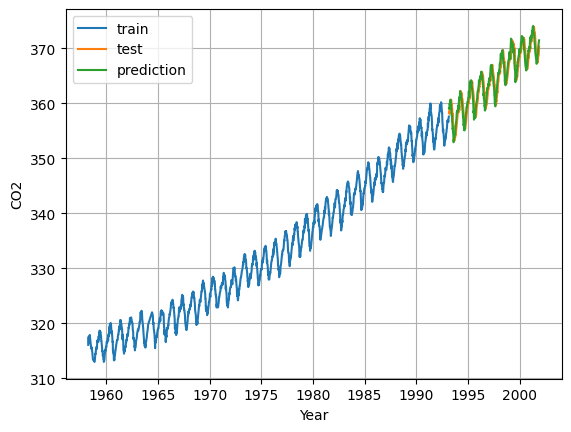

In [92]:
#Visualization
fig, ax = plt.subplots()
ax.plot(df["time"][:int(sample * train_ratio)], df["co2"][:int(sample * train_ratio)], label="train")
ax.plot(df["time"][int(sample * train_ratio):], df["co2"][int(sample * train_ratio):], label="test")
ax.plot(df["time"][int(sample * train_ratio):], z_predict, label="prediction")
ax.set_xlabel("Year")
ax.set_ylabel("CO2")
ax.legend()
ax.grid()
plt.show()